# Is there a correlation between measures of democracy and of quality of life?
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

I used the following data hosted by Gapminder World (www.gapminder.org): 

> **1) Democracy score.**  This is a summary measure of a country’s democratic and free nature, range from -10 to 10. It is sourced from the Polity Project by the Center for Systemic Peace (www.systemicpeace.org/polityproject)
>
> **2) Human Development Index.**  (HDI) This is a summary rate of countries based on levels of health, education, and living standard, and is sourced from the United Nations Development Reports (www.hdr.undp.org). 


In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


Import our data-

In [698]:
df_humdev = pd.read_csv(r'C:\Users\jminnick\Documents\Personal\Udacity Data Analytics Nanodegree\DA Project- Investigating Gapminder Data\hdi_human_development_index.csv')
df_dem = pd.read_csv(r'C:\Users\jminnick\Documents\Personal\Udacity Data Analytics Nanodegree\DA Project- Investigating Gapminder Data\democracy_score_use_as_color.csv')

Taking a look at the data-

In [677]:
df_humdev.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [678]:
df_dem.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


Democracy data is from 1800 to 2011 and human development index (HDI) is from 1990 to 2010.  That gives us from 1990 to 2011 to use for our correlation analysis. For a more natural break in the time period I will cut at 2010.

Let's see how many records each has (first number in either result below)-

In [681]:
df_humdev.shape

(187, 27)

In [680]:
df_dem.shape

(165, 213)

Next we check for duplicates- there are none.

In [682]:
sum(df_dem.duplicated()), sum(df_humdev.duplicated())

(0, 0)

In [683]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 213 entries, country to 2011
dtypes: float64(212), object(1)
memory usage: 274.7+ KB


In [684]:
df_humdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1990     143 non-null    float64
 2   1991     143 non-null    float64
 3   1992     143 non-null    float64
 4   1993     143 non-null    float64
 5   1994     143 non-null    float64
 6   1995     147 non-null    float64
 7   1996     147 non-null    float64
 8   1997     147 non-null    float64
 9   1998     147 non-null    float64
 10  1999     150 non-null    float64
 11  2000     167 non-null    float64
 12  2001     167 non-null    float64
 13  2002     167 non-null    float64
 14  2003     169 non-null    float64
 15  2004     172 non-null    float64
 16  2005     181 non-null    float64
 17  2006     181 non-null    float64
 18  2007     181 non-null    float64
 19  2008     181 non-null    float64
 20  2009     181 non-null    float64
 21  2010     187 non

Let's check datatypes.  I found that they are consistent.

In [689]:
df_dem.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
Length: 213, dtype: object

In [690]:
df_humdev.dtypes

country     object
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object

Check for nulls-

In [185]:
df_dem.isnull().sum()

country      0
1800       147
1801       147
1802       147
1803       147
          ... 
2007         4
2008         4
2009         4
2010         4
2011         4
Length: 213, dtype: int64

In [186]:
df_humdev.isnull().sum()

country     0
1990       44
1991       44
1992       44
1993       44
1994       44
1995       40
1996       40
1997       40
1998       40
1999       37
2000       20
2001       20
2002       20
2003       18
2004       15
2005        6
2006        6
2007        6
2008        6
2009        6
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
dtype: int64

### Data Cleaning

Since I will be focusing on the correlation analysis on 1990-2010, I need to drop the columns (years) I dont need-

In [699]:
df_dem.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [700]:
df_dem.drop(df_dem.iloc[:, 1:-22], inplace = True, axis = 1)
df_dem.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-8.0,-8.0,0.0,0.0,0.0,0.0,-7.0,-7.0,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, I'll drop the '2011' column from df_dem-

In [701]:
df_dem.drop(['2011'], inplace=True, axis = 1)
df_dem.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,-8.0,-8.0,0.0,0.0,0.0,0.0,-7.0,-7.0,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'd like to have the full dataset with all the democracy scores (1800-2011) for an exploratory / background analysis, so for this purpose I'll import the original dataset again-

In [702]:
df_dem_full = pd.read_csv(r'C:\Users\jminnick\Documents\Personal\Udacity Data Analytics Nanodegree\DA Project- Investigating Gapminder Data\democracy_score_use_as_color.csv')

After having dropped the unecessary columns for correlation analysis from the democracy dataframe, I'll need to drop a few columns from HDI data as well (years 2011-2015)-

In [703]:
df_humdev.drop(df_humdev.iloc[:,-5:], inplace=True, axis = 1)
df_humdev.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,0.295,0.3,0.309,0.305,0.3,0.324,0.328,0.332,0.335,...,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454


Datatypes were consistent when I checked in wrangling, so no cleaning needed.

Now let's remove countries (rows) with any nulls-- otherwise the data will be impacted by the changes over time in its availability. 

We will still have a viable dataset if we remove countries (rows) with any nulls (160 minimum notnulls for democracy scores by year and 143 minimum notnulls for HDI scores).

First, I wanted to look over boolean null values by row to ensure that eliminating rows with any nulls makes sense.

In [708]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_dem.isnull())

     country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
5      False  False  False  False  False  False  False  False  False  False   
6      False  False  False  False  False  False  False  False  False  False   
7      False  False  False  False  False  False  False  False  False  False   
8      False  False  False  False  False  False  False  False  False  False   
9      False  False  False  False  False  False  False  False  False  False   
10     False  False  False  False  False  False  False  False  False  False   
11     False  False  False  False  False  False  Fal

In [709]:
df_dem.isnull().sum()

country    0
1990       4
1991       4
1992       4
1993       3
1994       3
1995       4
1996       4
1997       4
1998       4
1999       4
2000       4
2001       5
2002       4
2003       4
2004       4
2005       4
2006       4
2007       4
2008       4
2009       4
2010       4
dtype: int64

In [714]:
df_dem.notnull().sum()

country    165
1990       161
1991       161
1992       161
1993       162
1994       162
1995       161
1996       161
1997       161
1998       161
1999       161
2000       161
2001       160
2002       161
2003       161
2004       161
2005       161
2006       161
2007       161
2008       161
2009       161
2010       161
dtype: int64

In [710]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_humdev.isnull())

     country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False   True   True   True   True   True   True   True   True   True   
4      False   True   True   True   True   True   True   True   True   True   
5      False   True   True   True   True   True   True   True   True   True   
6      False  False  False  False  False  False  False  False  False  False   
7      False  False  False  False  False  False  False  False  False  False   
8      False  False  False  False  False  False  False  False  False  False   
9      False  False  False  False  False  False  False  False  False  False   
10     False   True   True   True   True   True  False  False  False  False   
11     False   True   True   True   True   True   Tr

In [705]:
df_humdev.isnull().sum()

country     0
1990       44
1991       44
1992       44
1993       44
1994       44
1995       40
1996       40
1997       40
1998       40
1999       37
2000       20
2001       20
2002       20
2003       18
2004       15
2005        6
2006        6
2007        6
2008        6
2009        6
2010        0
dtype: int64

In [715]:
df_humdev.notnull().sum()

country    187
1990       143
1991       143
1992       143
1993       143
1994       143
1995       147
1996       147
1997       147
1998       147
1999       150
2000       167
2001       167
2002       167
2003       169
2004       172
2005       181
2006       181
2007       181
2008       181
2009       181
2010       187
dtype: int64

Now we know that it makes sense to remove all countries (rows) with null values, and so we'll go ahead and drop them-

In [716]:
df_dem.dropna(inplace=True)
df_dem.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
dtype: int64

In [717]:
df_dem.shape

(159, 22)

In [718]:
df_humdev.dropna(inplace=True)
df_humdev.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
dtype: int64

In [719]:
df_humdev.shape

(143, 22)

That gives us 159 countries for democracy scores and 143 for HDI scores. 

Now I want to make sure I've got the same countries in HDI as I do in democracy, so I did a merge (inner) on country between the two, leaving me with 133 countries common to both datasets-

In [332]:
df_countries = df_dem.merge(df_humdev, how='inner', on='country').country.to_frame()
df_countries

,country
0,Albania
1,Algeria
2,Argentina
3,Armenia
4,Australia
...,...
128,Venezuela
129,Vietnam
130,Yemen
131,Zambia


Check for number of unique values just to ensure I'm accounting for all index values (countries) that I'm working with.

In [158]:
df_countries.nunique()

133

Now that I have the exact (133) countries I'll be using for the analysis, I need to pull up their values in all three of my datasets (democracy, HDI, and democracy back to 1800), so I'll do an inner join with each-

In [720]:
df_dem_tr = df_countries.set_index('country').join(df_dem.set_index('country'))
df_dem_tr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,1.0,1.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,...,5.0,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0
Algeria,-2.0,-2.0,-7.0,-7.0,-7.0,-3.0,-3.0,-3.0,-3.0,-3.0,...,-3.0,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Argentina,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Armenia,0.0,7.0,7.0,7.0,7.0,3.0,-6.0,-6.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Australia,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,...,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,-3.0,-3.0
Vietnam,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
Yemen,-5.0,-4.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [721]:
df_hd_tr = df_countries.set_index('country').join(df_humdev.set_index('country'))
df_hd_tr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,0.725,0.738
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,0.714,0.724
Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,...,0.776,0.770,0.775,0.780,0.782,0.788,0.792,0.794,0.802,0.816
Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,0.639,...,0.645,0.657,0.668,0.679,0.692,0.707,0.721,0.725,0.720,0.729
Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,0.897,...,0.902,0.905,0.908,0.910,0.915,0.918,0.921,0.925,0.927,0.927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.634,0.644,0.650,0.653,0.654,0.658,0.660,0.664,0.667,0.670,...,0.684,0.688,0.687,0.700,0.714,0.728,0.745,0.754,0.754,0.756
Vietnam,0.477,0.486,0.498,0.508,0.519,0.531,0.542,0.542,0.562,0.569,...,0.584,0.592,0.601,0.609,0.618,0.625,0.633,0.641,0.647,0.655
Yemen,0.405,0.408,0.412,0.414,0.418,0.421,0.424,0.428,0.432,0.436,...,0.450,0.457,0.464,0.470,0.475,0.477,0.480,0.483,0.488,0.493


Checking country counts to see the difference (26 countries removed from the democracy data and 10 removed from human develpment data).

In [722]:
df_dem.country.count(), df_humdev.country.count()

(159, 143)

Now for the full democracy data-

In [723]:
df_alldem_tr = df_countries.set_index('country').join(df_dem_full.set_index('country'))
df_alldem_tr

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,5.0,5.0,5.0,-3.0,-3.0,-3.0
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


Also want to drop the '2011' column from the full (1800<) democracy dataframe-

In [724]:
df_alldem_tr.drop(['2011'], inplace=True, axis = 1)
df_alldem_tr.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


I'd like to have the two versions of the full democracy dataset- one with the 133 countries in the correlation analysis, and a second version with all rows with null values eliminated. 

The former will allow me to have continuity in the greater analysis for this project, however with the drawback that that data is impacted by the addition of countries to the dataset over that timeframe, as opposed to real change in the measured variable. The latter (smaller) dataset will provide an interesting picture of the changes in democracy over time free from any impact from countries being added to the data over the timeframe. I'm going to go back and use the version prior to trimming it to 133 countries.

In [725]:
df_dem_full.isnull().sum()

country      0
1800       147
1801       147
1802       147
1803       147
          ... 
2007         4
2008         4
2009         4
2010         4
2011         4
Length: 213, dtype: int64

Now dropping nulls as well as changing the dataframe name-

In [726]:
df_dem_full.dropna(inplace=True)
df_alldem_nonulls = df_dem_full
df_alldem_nonulls

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
7,Austria,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
29,China,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
40,Denmark,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
52,France,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
69,Iran,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,3.0,3.0,-6.0,-6.0,-6.0,-6.0,-6.0,-7.0,-7.0,-7.0
75,Japan,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
102,Nepal,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-6.0,-6.0,-6.0,-6.0,6.0,6.0,6.0,6.0,6.0,6.0
111,Oman,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
119,Portugal,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
122,Russia,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0


Since initial index is now a bit awkward (see above) I want to assign 'Country' as the new index-

In [727]:
df_alldem_nonulls.set_index('country', inplace=True, verify_integrity=False)
df_alldem_nonulls

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Austria,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
China,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
Denmark,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
France,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Iran,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,3.0,3.0,-6.0,-6.0,-6.0,-6.0,-6.0,-7.0,-7.0,-7.0
Japan,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Nepal,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-6.0,-6.0,-6.0,-6.0,6.0,6.0,6.0,6.0,6.0,6.0
Oman,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
Portugal,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Now I've got four working datasets-

1) df_dem_tr-- democracy scores from 1990-2010 for the 133 focus countries

2) df_hd_tr-- human development scores from 1990-2010 for the 133 focus countries

3) df_alldem_tr-- full time series of the democracy scores (from 1800-2010) for the 133 focus countries

4) df_alldem_nonulls-- full time series of the democracy scores (from 1800-2010) with no null data (16 countries)

<a id='eda'></a>
## Exploratory Data Analysis

### How do scores trend from 1990 to 2010 for democracy and for human development?

Average democracy score by year over the 133 countries-

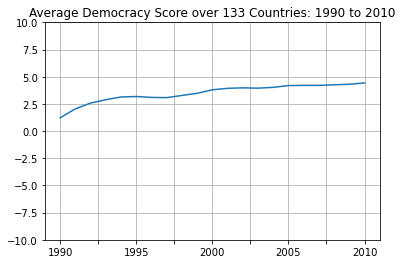

In [744]:
df_dem_tr.mean().plot.line()
plt.ylim(-10,10)
plt.title('Average Democracy Score over 133 Countries: 1990 to 2010')
plt.grid(True)
plt.savefig("Avg_Dem");

Let's reduce the y range to see the changes better (now that we've seen growth in respect to the full scale of the democracy score measure)- 

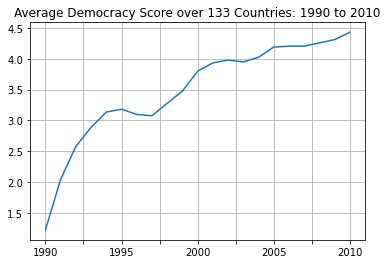

In [745]:
df_dem_tr.mean().plot.line()
plt.title('Average Democracy Score over 133 Countries: 1990 to 2010')
plt.grid(True)
plt.savefig("Avg_Dem_Zoom");

For more context, let's see what this growth looks like relative to the entire democracy scale-

In [746]:
(df_dem_tr['2010'].mean() - df_dem_tr['1990'].mean()) / 20

0.16015037593984963

From 1990 to 2010, democracy scores increased 16% of the total scale (-10 to 10).

Now let's plot average human development score-

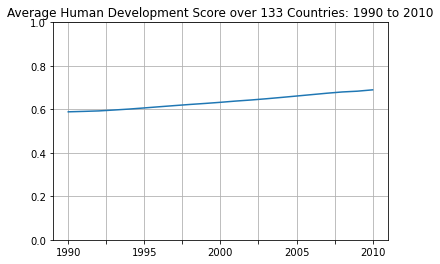

In [747]:
df_hd_tr.mean().plot.line()
plt.ylim(0,1)
plt.title('Average Human Development Score over 133 Countries: 1990 to 2010')
plt.grid(True)
plt.savefig("Avg_HDI");

And again let's see the HDI measure closer up (though the plot is much more static than with the democracy plot)-

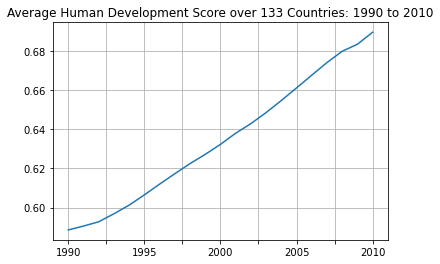

In [748]:
df_hd_tr.mean().plot.line()
plt.title('Average Human Development Score over 133 Countries: 1990 to 2010')
plt.grid(True)
plt.savefig("Avg_HDI_Zoom");

Now let's see growth during this period relative to the entire human development scale (0 to 1)-

In [749]:
(df_hd_tr['2010'].mean() - df_hd_tr['1990'].mean()) / 1

0.1010526315789474

Looks like the average human development score increased 10.1% of the total scale during this period. This means that democracy scores saw a greater increase (16%) over this period (relative to its own metric) than did human development scores. 

While democracy saw a greater relative increase, it's interesting to note that its growth was decelerating over that time, while human development scores saw a very steady increase.

### For greater context, how did the average democracy score change for these 133 countries over the entirety of the available data (1800 to 2010)?
(Nulls included)

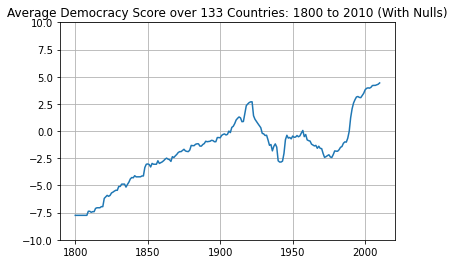

In [756]:
df_alldem_tr.mean().plot.line()
plt.ylim(-10,10)
plt.title('Average Democracy Score over 133 Countries: 1800 to 2010 (With Nulls)')
plt.grid(True)
plt.savefig("Avg_Dem_1800_Nulls");

Let's look at democracy scores by individual years- specifically I'd like to see when the most recent upward trend began-

In [752]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_alldem_tr.mean())

1800   -7.750000
1801   -7.750000
1802   -7.750000
1803   -7.750000
1804   -7.750000
1805   -7.750000
1806   -7.750000
1807   -7.750000
1808   -7.750000
1809   -7.375000
1810   -7.375000
1811   -7.470588
1812   -7.411765
1813   -7.411765
1814   -7.111111
1815   -7.052632
1816   -7.052632
1817   -7.052632
1818   -6.950000
1819   -6.950000
1820   -6.190476
1821   -6.045455
1822   -5.913043
1823   -6.000000
1824   -5.916667
1825   -5.692308
1826   -5.615385
1827   -5.518519
1828   -5.444444
1829   -5.444444
1830   -5.093750
1831   -5.093750
1832   -4.878788
1833   -4.878788
1834   -4.878788
1835   -5.151515
1836   -4.909091
1837   -4.696970
1838   -4.400000
1839   -4.270270
1840   -4.297297
1841   -4.105263
1842   -4.210526
1843   -4.210526
1844   -4.205128
1845   -4.205128
1846   -4.128205
1847   -4.128205
1848   -3.350000
1849   -3.050000
1850   -3.025000
1851   -3.075000
1852   -3.300000
1853   -2.975000
1854   -3.050000
1855   -3.050000
1856   -3.050000
1857   -2.731707
1858   -2.9756

Observations:

The democracy score saw its strongest upward trend from 1977 through the extent of the data in 2010. This upward trajectory in democracy had followed a 55-year downward trend in global democracy from 1922 to 1977 (by far the most dramatic downward trend in democracy in this data beginning in 1800).  While these interesting findings are tertiary to the our driving question, they do provide meaningful context for the target analysis, that is, democracy scores and human development scores between 1990 and 2010. 

For a last bit of perspective:  

Let's look at average democracy score for the dataset we'd created earlier with NULLS REMOVED (this set contains only 16 countries)-

In [753]:
df_alldem_nonulls.index

Index(['Austria', 'China', 'Denmark', 'France', 'Iran', 'Japan', 'Nepal',
       'Oman', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Thailand', 'Turkey',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

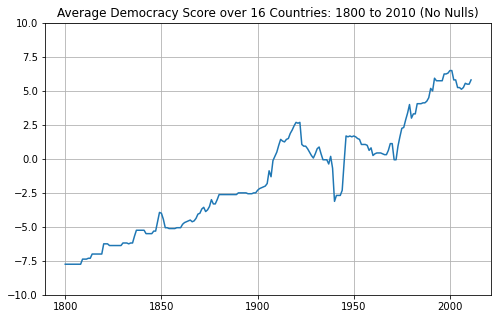

In [757]:
df_alldem_nonulls.mean().plot.line(figsize=(8,5))
plt.ylim(-10,10)
plt.title('Average Democracy Score over 16 Countries: 1800 to 2010 (No Nulls)')
plt.grid(True)
plt.savefig("Avg_Dem_1800_NoNulls");

Let's compare these two democracy score sets on one plot-

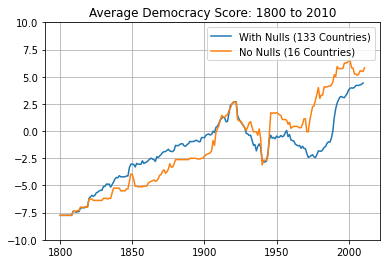

In [762]:
df_alldem_tr.mean().plot.line(label='With Nulls (133 Countries)')
df_alldem_nonulls.mean().plot.line(label='No Nulls (16 Countries)')
plt.ylim(-10,10)
plt.title('Average Democracy Score: 1800 to 2010')
plt.grid(True)
plt.legend()
plt.savefig("Avg_Dem_1800_Comp");

I'm curious to see how countries were added over time-

In [525]:
df_country_total = 133 - df_alldem_tr.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_country_total)

1800     16
1801     16
1802     16
1803     16
1804     16
1805     16
1806     16
1807     16
1808     16
1809     16
1810     16
1811     17
1812     17
1813     17
1814     18
1815     19
1816     19
1817     19
1818     20
1819     20
1820     21
1821     22
1822     23
1823     23
1824     24
1825     26
1826     26
1827     27
1828     27
1829     27
1830     32
1831     32
1832     33
1833     33
1834     33
1835     33
1836     33
1837     33
1838     35
1839     37
1840     37
1841     38
1842     38
1843     38
1844     39
1845     39
1846     39
1847     39
1848     40
1849     40
1850     40
1851     40
1852     40
1853     40
1854     40
1855     40
1856     40
1857     41
1858     41
1859     42
1860     42
1861     43
1862     43
1863     43
1864     43
1865     43
1866     43
1867     45
1868     46
1869     46
1870     46
1871     46
1872     46
1873     46
1874     46
1875     46
1876     46
1877     46
1878     46
1879     47
1880     47
1881     47
1882     47
1883

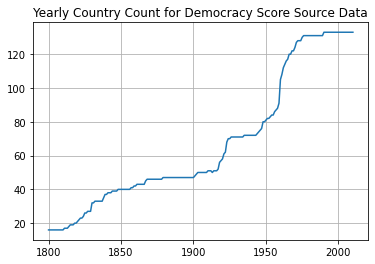

In [764]:
df_country_total.plot.line()
plt.title('Yearly Country Count for Democracy Score Source Data')
plt.grid(True)
plt.savefig("Country_Count");

With the visual above (and a copy below of the comparison plot for reference), we see the number of countries added to the report (more or less) plateaued in the early 1970s. Coincidentally, the report reached the full 133 country number in 1990, the first year of our target data.

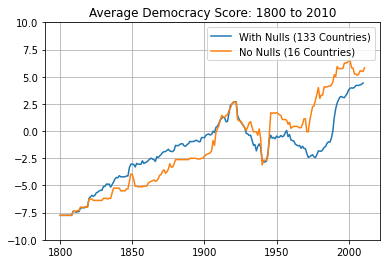

In [762]:
df_alldem_tr.mean().plot.line(label='With Nulls (133 Countries)')
df_alldem_nonulls.mean().plot.line(label='No Nulls (16 Countries)')
plt.ylim(-10,10)
plt.title('Average Democracy Score: 1800 to 2010')
plt.grid(True)
plt.legend()
plt.savefig("Avg_Dem_1800_Comp");

Seeing these two datasets (nulls and nonulls) gives us an enlightening picture of the validity of the (now cleaned) data we're working with.  

## Key Question: Are democracy scores correlated with human development scores?

First, we calculate the correlation of the mean scores for democracy and human development for the trimmed datasets (1990-2010).

In [668]:
df_dem_tr.mean().corr(df_hd_tr.mean())

0.8943483253950874

The correlation is significant. 

Let's see it plotted-

In [767]:
year_labels = df_dem_tr.columns.tolist()
year_labels

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010']

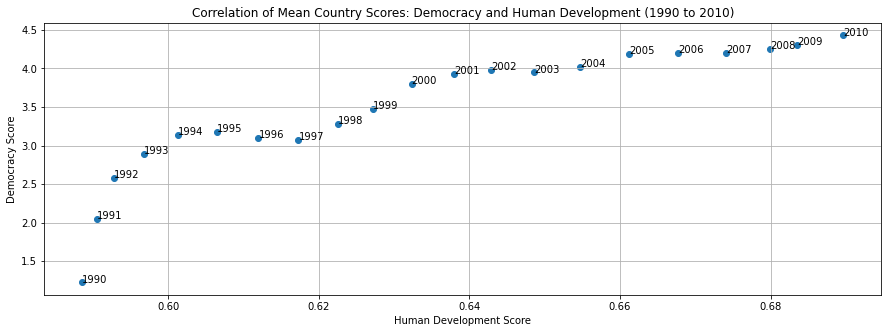

In [794]:
x = df_hd_tr.mean()
y = df_dem_tr.mean()
point_labels = list(df_dem_tr.columns)

plt.scatter(x,y)
plt.gcf().set_size_inches(15,5)

for x_pos,y_pos,label in zip(x,y,labels):
    plt.annotate(label,
                xy=(x_pos,y_pos))

plt.title('Correlation of Mean Country Scores: Democracy and Human Development (1990 to 2010)')
plt.ylabel('Democracy Score')
plt.xlabel('Human Development Score')
plt.grid(True)
plt.savefig("Mean_Scatter")
plt.show();    

While the overall correlation was significant (0.89), plotting indicated some apparent diminishing of the correlation over time. Compare the changes from 1990-1994 (lower quartile) with the changes from 2006-2010 (upper quartile)- much less change in democracy score as human development saw consistent increases.

Let's see what happens when we scatterplot all scores agnostic to year-

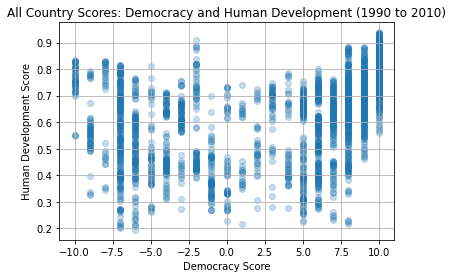

In [777]:
x = df_dem_tr
y = df_hd_tr
plt.scatter(x,y,alpha=0.25)
plt.title('All Country Scores: Democracy and Human Development (1990 to 2010)')
plt.xlabel('Democracy Score')
plt.ylabel('Human Development Score')
plt.grid(True)
plt.savefig("All_Scatter_XDem")
plt.show(); 

Let's try swapping the axes for more perspective on any trends-

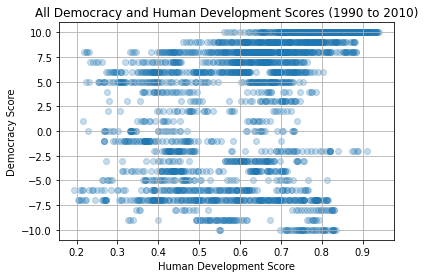

In [780]:
x = df_hd_tr
y = df_dem_tr
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (1990 to 2010)')
plt.xlabel('Human Development Score')
plt.ylabel('Democracy Score')
plt.grid(True)
plt.savefig("All_Scatter_XHDI")
plt.show(); 

Over the entire period, the correlation is most obvious when democracy scores occur in the top quartile.  Specifically:

1) All democracy scores of 10 were correlated with human development scores 0.55 and above.

2) Democracy scores of 9 were never below a 0.45 HDI score.

3) Low-score HDI outliers emerge when democracy scores fall at 8, nevertheless a vast majority of HDI scores in that case exceed an HDI score of 0.4.

CAVEAT- While high democracy scores predict high human development scores, high human development scores are not a reliable predictor of high democracy scores. That said, the most significant concentration of high human development scores clearly predict high democracy scores.

Now let's plot all 133 country scores for a few specific years (1990, 2000, and 2010)-

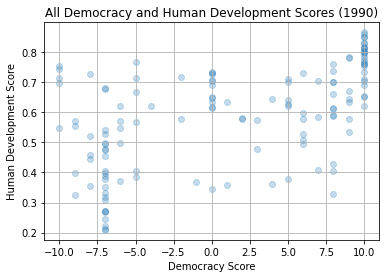

In [781]:
x = df_dem_tr['1990']
y = df_hd_tr['1990']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (1990)')
plt.xlabel('Democracy Score')
plt.ylabel('Human Development Score')
plt.grid(True)
plt.savefig("1990_Scatter_XDem")
plt.show(); 

Swap the axes-

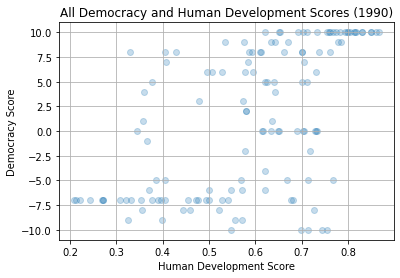

In [789]:
x = df_hd_tr['1990']
y = df_dem_tr['1990']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (1990)')
plt.ylabel('Democracy Score')
plt.xlabel('Human Development Score')
plt.grid(True)
plt.savefig("1990_Scatter_XHDI")
plt.show(); 

Even with just 1990 plotted, the clustering that jumps out is at democracy score 10, clustered at high scores on the human development scale between 0.75 and 0.85.

Now let's try the year 2000-

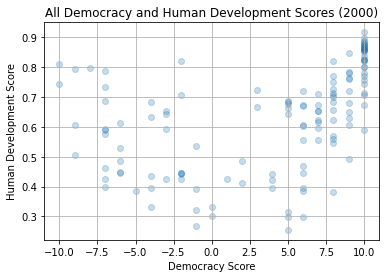

In [783]:
x = df_dem_tr['2000']
y = df_hd_tr['2000']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (2000)')
plt.xlabel('Democracy Score')
plt.ylabel('Human Development Score')
plt.grid(True)
plt.savefig("2000_Scatter_XDem")
plt.show(); 

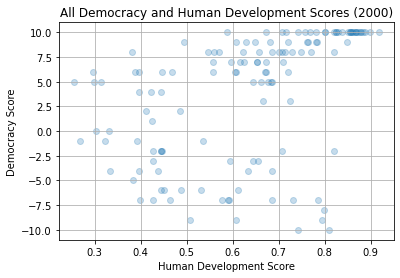

In [790]:
x = df_hd_tr['2000']
y = df_dem_tr['2000']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (2000)')
plt.ylabel('Democracy Score')
plt.xlabel('Human Development Score')
plt.grid(True)
plt.savefig("2000_Scatter_XHDI")
plt.show(); 

The year 2000 showed an even tighter cluster at democracy level 10, this time concentrated around 0.85 human development score.

Finally let's plot the year 2010-

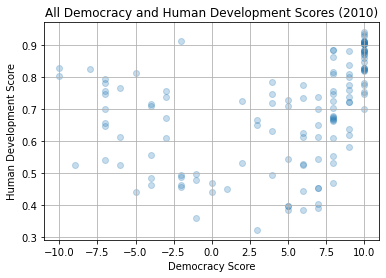

In [785]:
x = df_dem_tr['2010']
y = df_hd_tr['2010']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (2010)')
plt.xlabel('Democracy Score')
plt.ylabel('Human Development Score')
plt.grid(True)
plt.savefig("2010_Scatter_XDem")
plt.show(); 

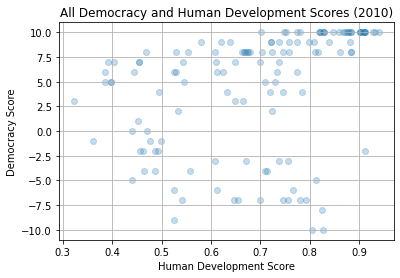

In [791]:
x = df_hd_tr['2010']
y = df_dem_tr['2010']
plt.scatter(x,y,alpha=0.25)
plt.title('All Democracy and Human Development Scores (2010)')
plt.ylabel('Democracy Score')
plt.xlabel('Human Development Score')
plt.grid(True)
plt.savefig("2010_Scatter_XHDI")
plt.show(); 

The democracy score of 10 continued to predict the highest human development scores, this time with the strongest concentration around 0.9 human development.

Cutting the correlation plot by year therefore further supports the predictive ability of a high democracy score for a high human development score, specifically that democracy scores of 10 clearly predicted the strongest concentration of high human development scores.

<a id='conclusions'></a>
## Conclusions

We discovered a significant correlation between democracy scores and human development scores, according to this data, yet not without some nuances.  

Initially, when separately plotting average scores for democracy and for human development, we noted that while average democracy scores trended strongly upward from 1990 to 2010, increasing all but three years, growth was decelerating overall during that time. The increase in human development scores, meanwhile, was very steady, increasing each year. Additionally, it was interesting to note that, relative to their respective scales of measurement, democracy scores saw a 16% increase while human development scores rose 10.1%.

For the heart of our analysis, we used the mean scores over all countries for each year to calculate a significant correlation of 0.89. When plotting the scores for all 133 countries agnostic to year, there was a noticeable positive correlation between the two measures when democracy scores were in the top quartile (5 to 10), and democracy scores of 9 or 10 predicted human development in the top two quartiles of human development scores. At our closest look, correlation was clearly observed at democracy score 10, with the concentration of human development scores at this democracy score slowly climbing from 0.8 to 0.9 over the 21-year sample. This was observed when plotting all countries on separate plots for the years 1990, 2000, and 2010.

Further analysis:  While the overall correlation was significant (0.89), plotting indicated some apparent diminishing of the correlation over time. Specifically, when comparing the changes from 1990-1994 (lower quartile) with the changes from 2006-2010 (upper quartile), there was much less yearly change in democracy score in the latter years, while human development increased consistently. Finally, although human development scores were not a significant predictor of high democracy scores, the most significant concentration of high human development scores in the plot clearly correlated with high democracy scores.